## Analysis initialization and simplified ETL

### Importing main libraries and visualizing data format

In [1]:
# Impoirting basic required packages
import numpy as np
import pandas as pd

Load Database

In [2]:
# Loading a dataset as a dataframe by pandas
df = pd.read_csv('agricultural_raw_material.csv')

Exploring Dataset

In [3]:
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

Treatment of incorrect and invalid data

In [4]:
# Using the replace command to realise the treatment

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan) # treating a defective column

# Dropping rows with Not a Number (NaN) values

df = df.dropna()

# Checking to see if all NaN velues are treating

df.isnull().sum()

# Converting data type to float

lst = [
    "Coarse wool Price",
    "Coarse wool price % Change",
    "Copra Price",
    "Copra price % Change",
    "Cotton Price",
    "Cotton price % Change",
    "Fine wool Price",
    "Fine wool price % Change",
    "Hard log Price",
    "Hard log price % Change",
    "Hard sawnwood Price",
    "Hard sawnwood price % Change",
    "Hide Price",
    "Hide price % change",
    "Plywood Price",
    "Plywood price % Change",
    "Rubber Price",
    "Rubber price % Change",
    "Softlog Price",
    "Softlog price % Change",
    "Soft sawnwood Price",
    "Soft sawnwood price % Change",
    "Wood pulp Price",
    "Wood pulp price % Change"
]
df[lst] = df[lst].astype("float64")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


### Datetime index column

Formating the datetime column an seting it as an index column to the daset

In [5]:
# prompt: Formate a coluna Month para datetime padrão brasil

df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df.set_index('Month', inplace=True)

## Exploratory Analysis

### Importing and configurating Data Visualization Libraries

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# standard configuration to all charts

%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

df.columns

Index(['Coarse wool Price', 'Coarse wool price % Change', 'Copra Price',
       'Copra price % Change', 'Cotton Price', 'Cotton price % Change',
       'Fine wool Price', 'Fine wool price % Change', 'Hard log Price',
       'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

### Mapa de calor by correlation between materials price behavior

<function matplotlib.pyplot.show(close=None, block=None)>

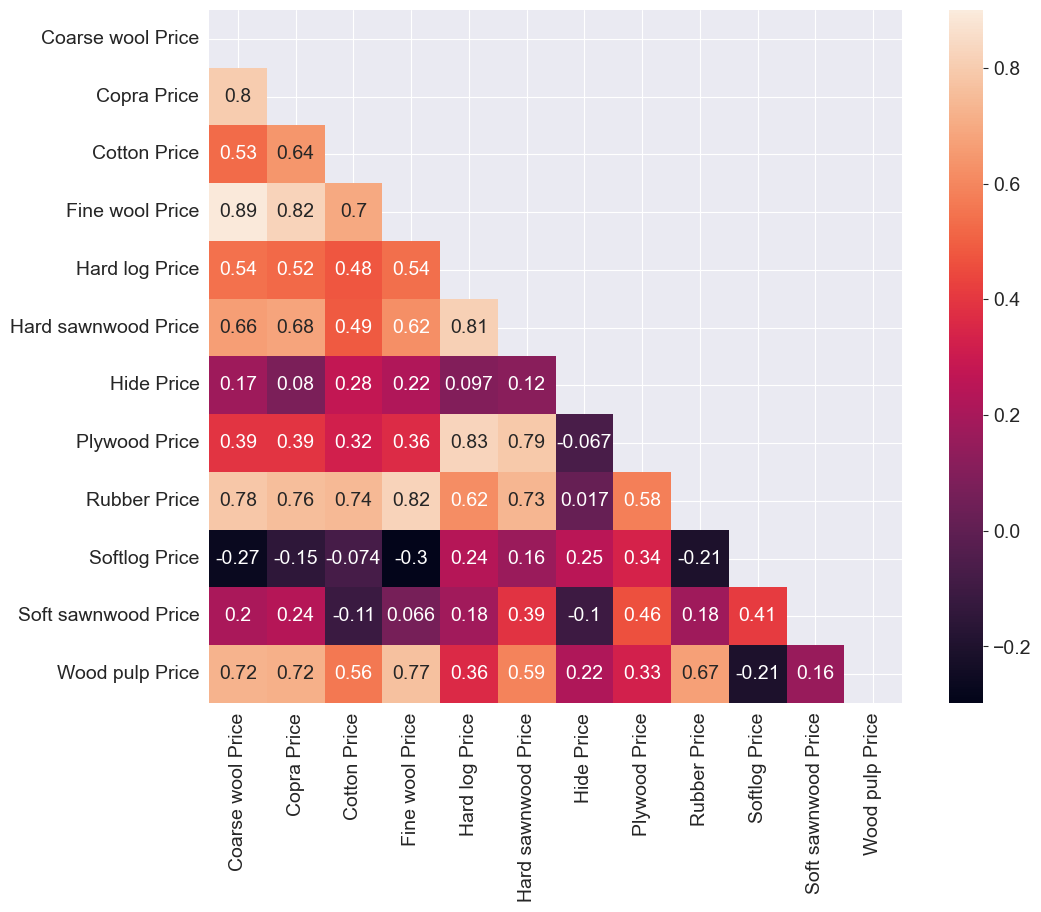

In [7]:
# defining raw materials list
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
'Soft sawnwood Price', 'Wood pulp Price']

# geting the correlation matrix
corrmat = df[raw_data].corr()

# setting teh size of plot
fig = plt.figure(figsize = (12, 9))

# masking the upper triangle part since matrix is symmetric (representative)
mask = np.triu(np.ones_like(corrmat, dtype = bool))
sns.heatmap(corrmat, vmax = .9, mask = mask, square = True, annot = True)
plt.show

Next staps:
* calculate and understand the average of the correlation factors
* understand what materials with negative and positive correlations mean, as well as materials with a correlation factor above and below the average of the factors

obs: remember, in statistics, a strong correlation is usually a correlation above 0.7.


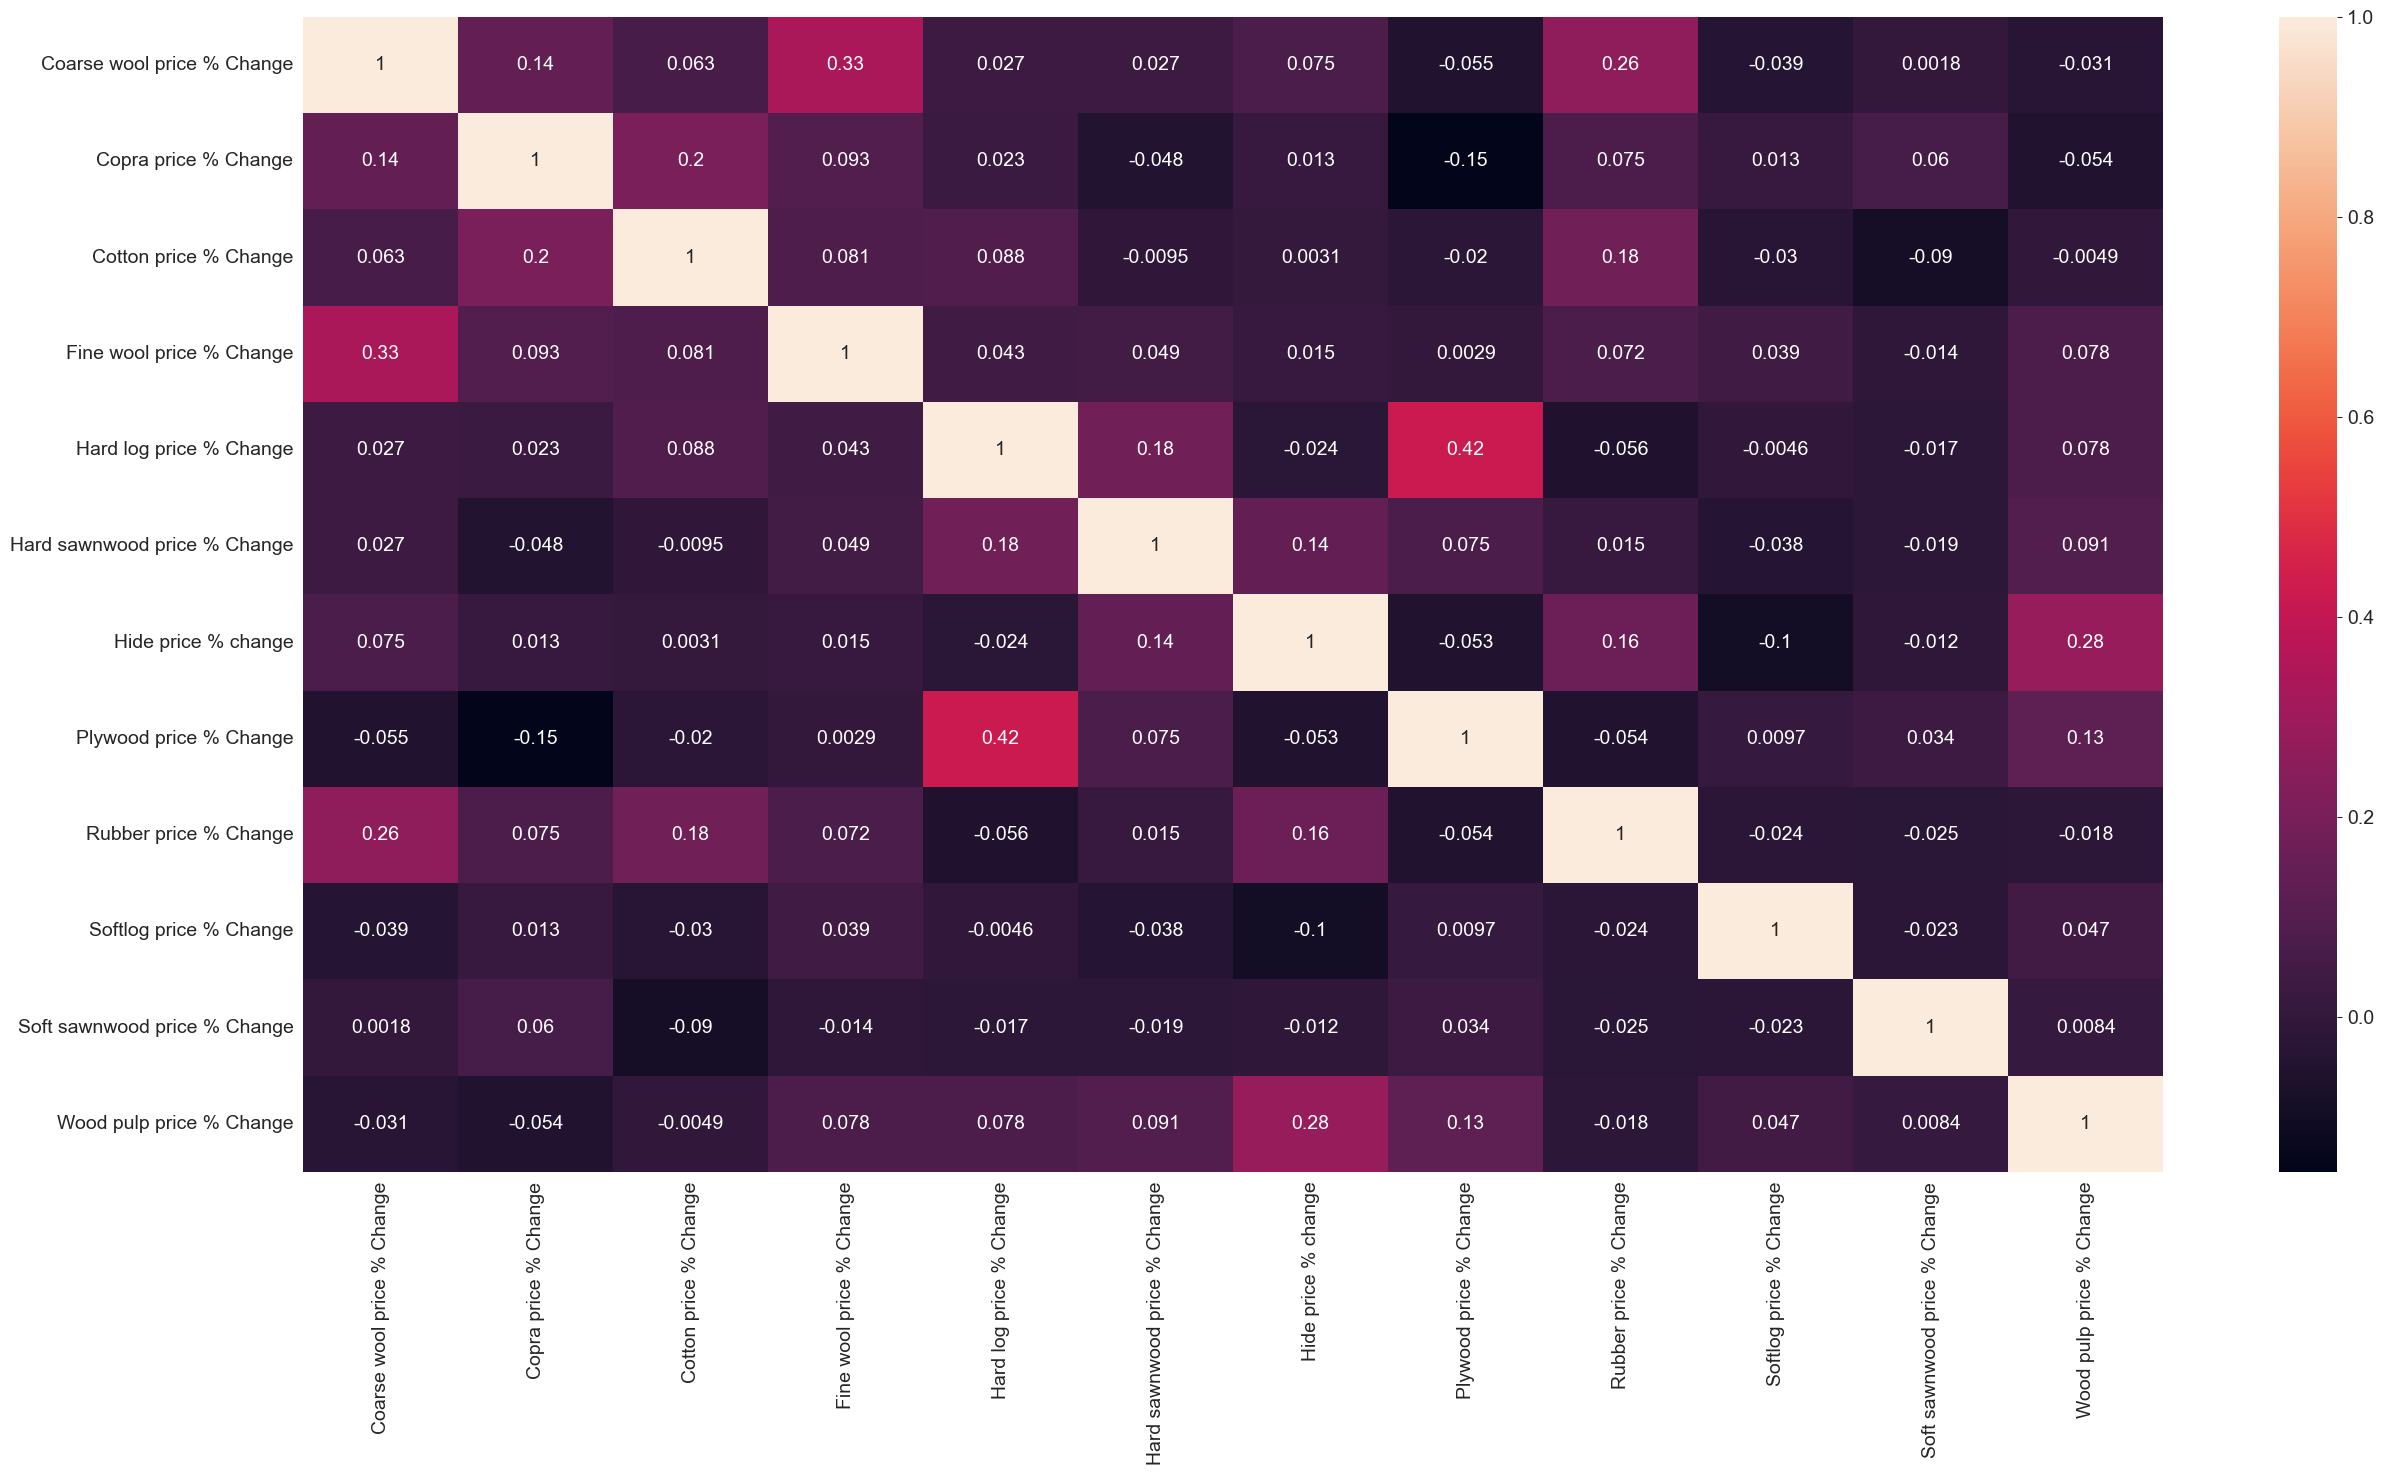

In [8]:
plt.figure(figsize=(30, 15))
changelist = ['Coarse wool price % Change', 'Copra price % Change',
              'Cotton price % Change', 'Fine wool price % Change',
              'Hard log price % Change', 'Hard sawnwood price % Change',
              'Hide price % change', 'Plywood price % Change',
              'Rubber price % Change', 'Softlog price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

# generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir desses gráficos podemos dizer que quase não há correlação entre a variação percentual dos preços das matérias primas.



### Deep Dive in a specific material: Coarse wool

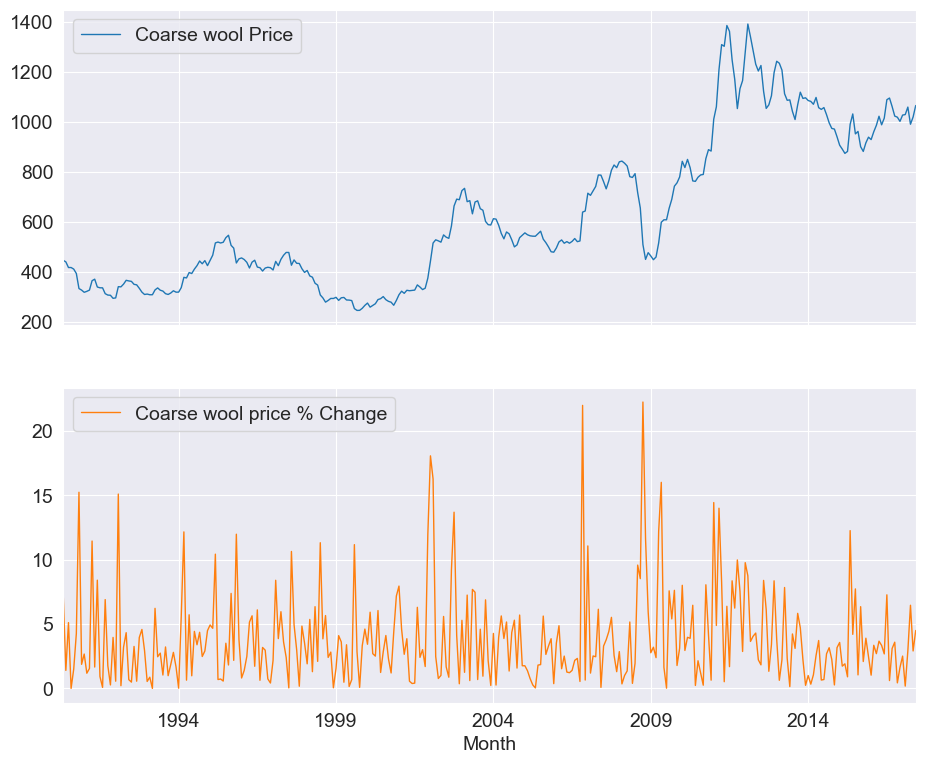

In [9]:
axes = df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Value Capture by Analysis

### Q1: Findings about normal price variation each feedstock

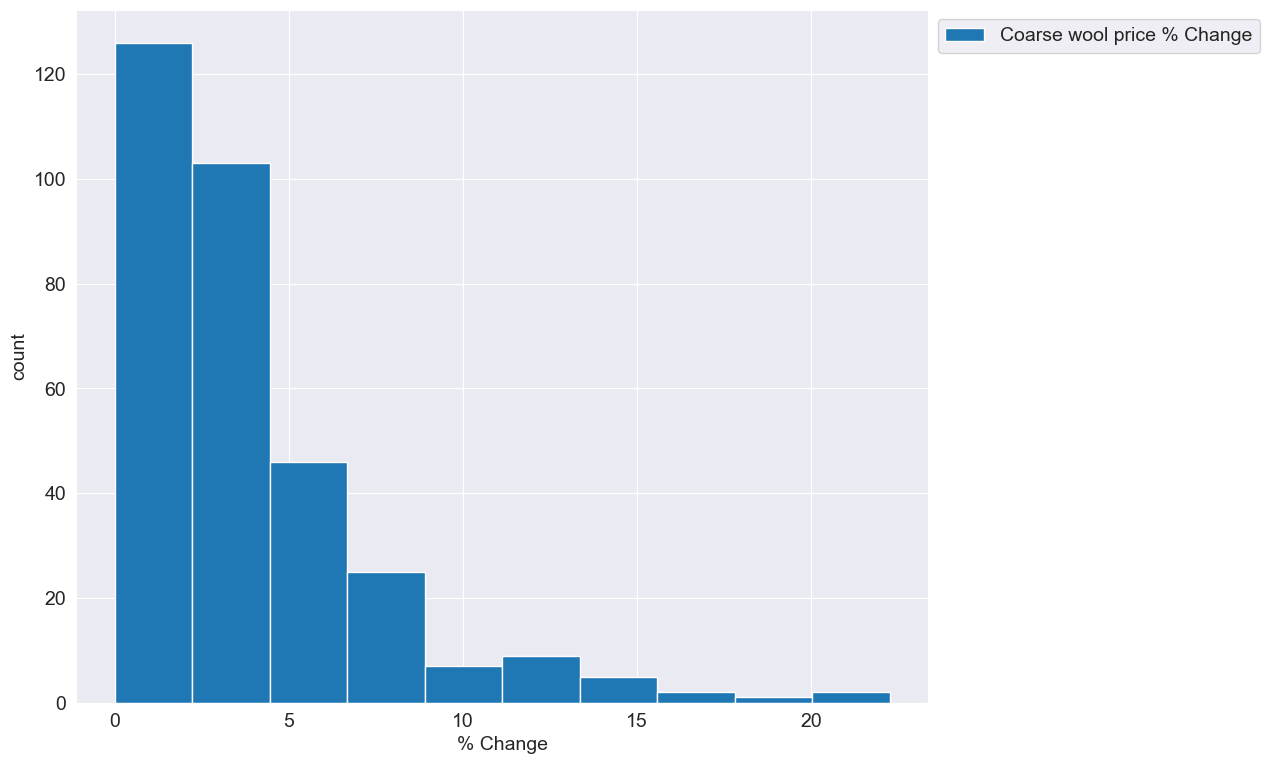

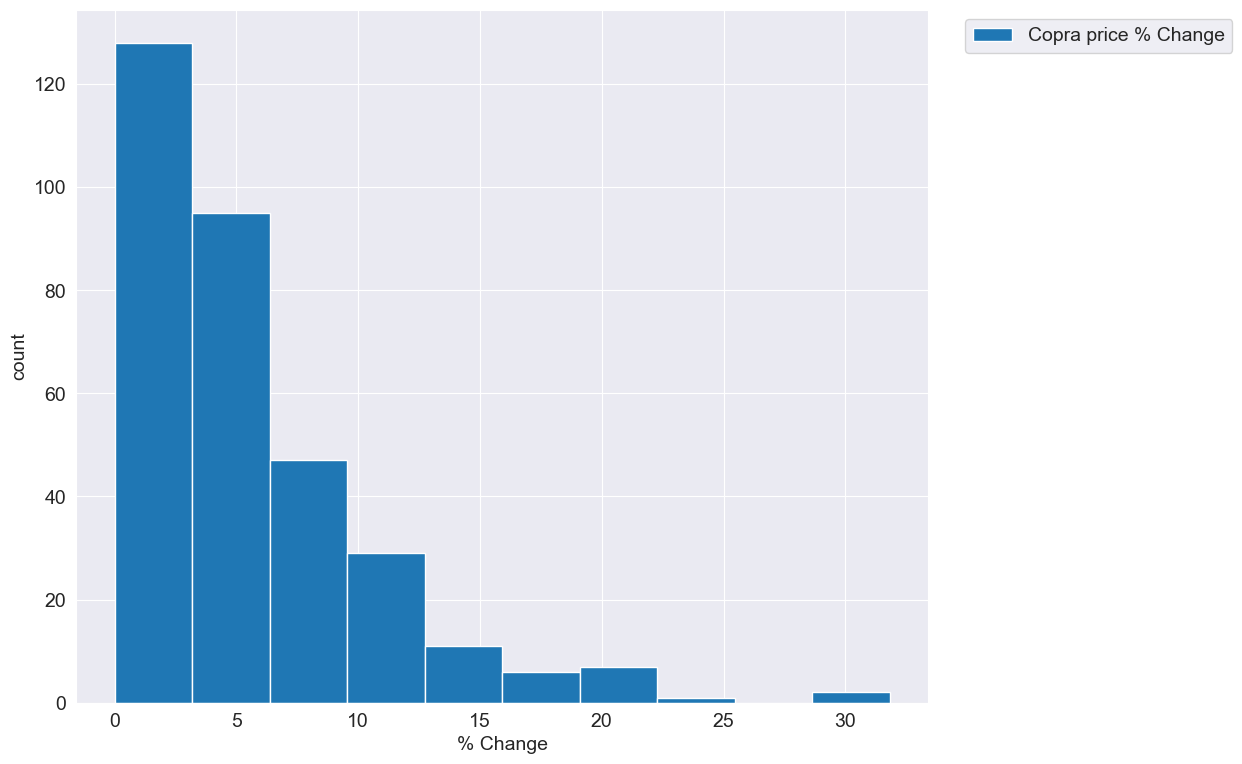

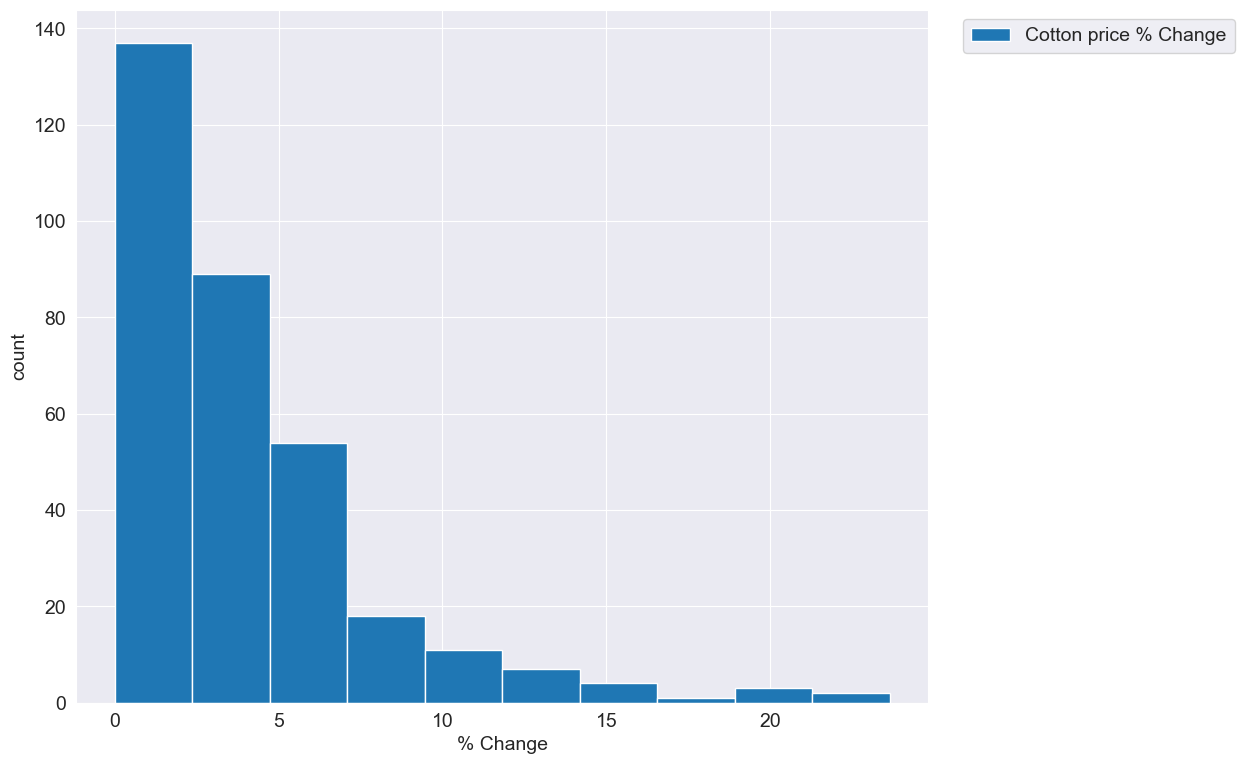

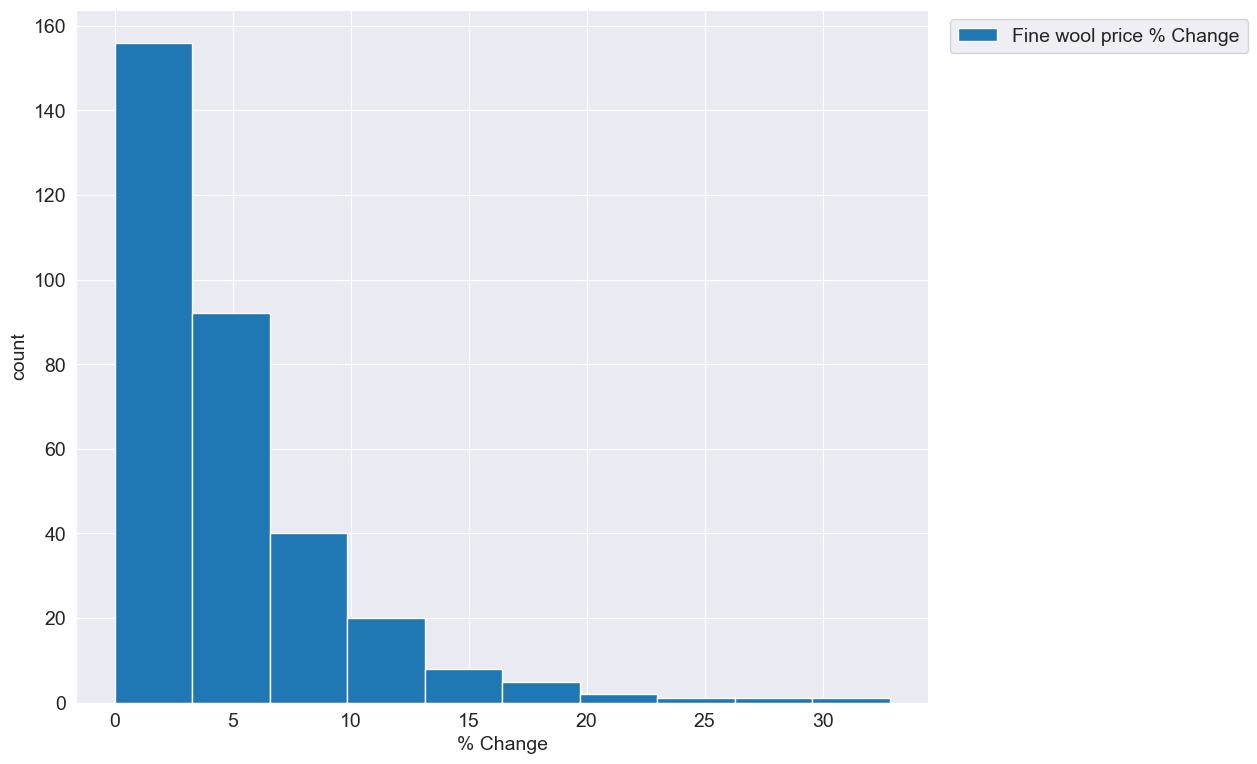

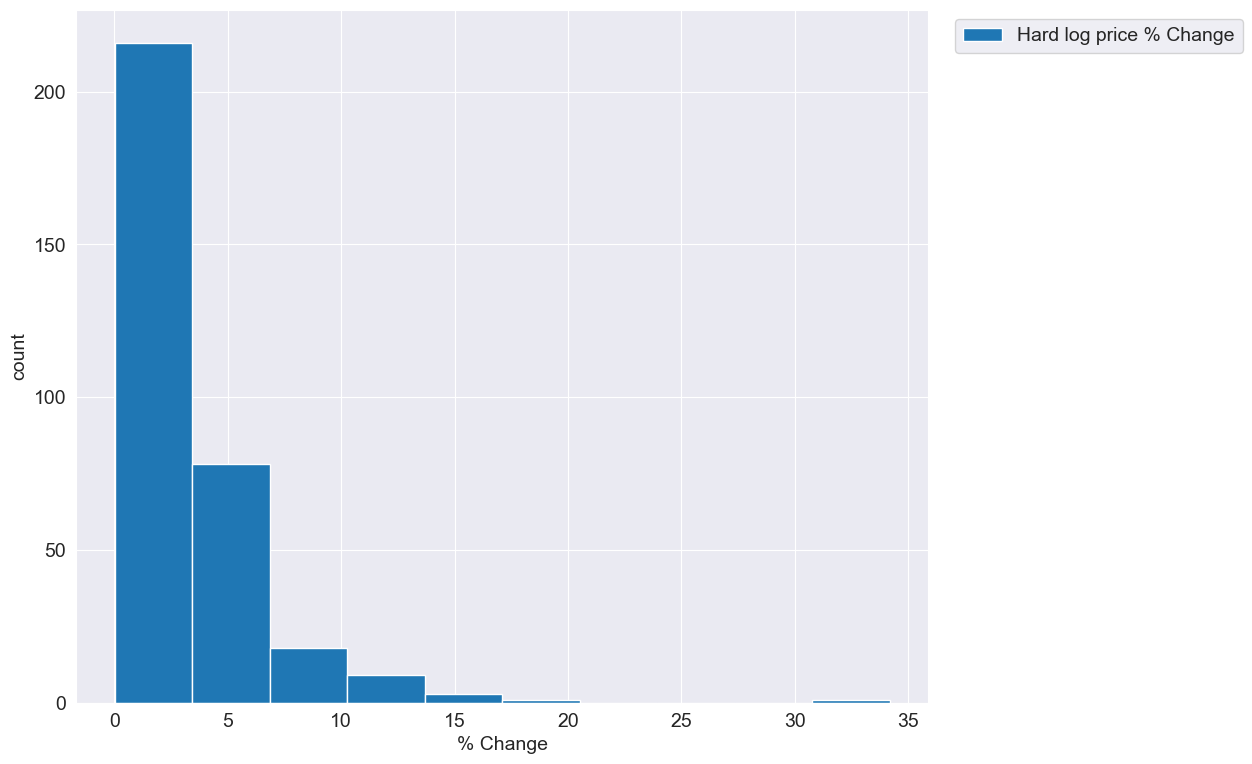

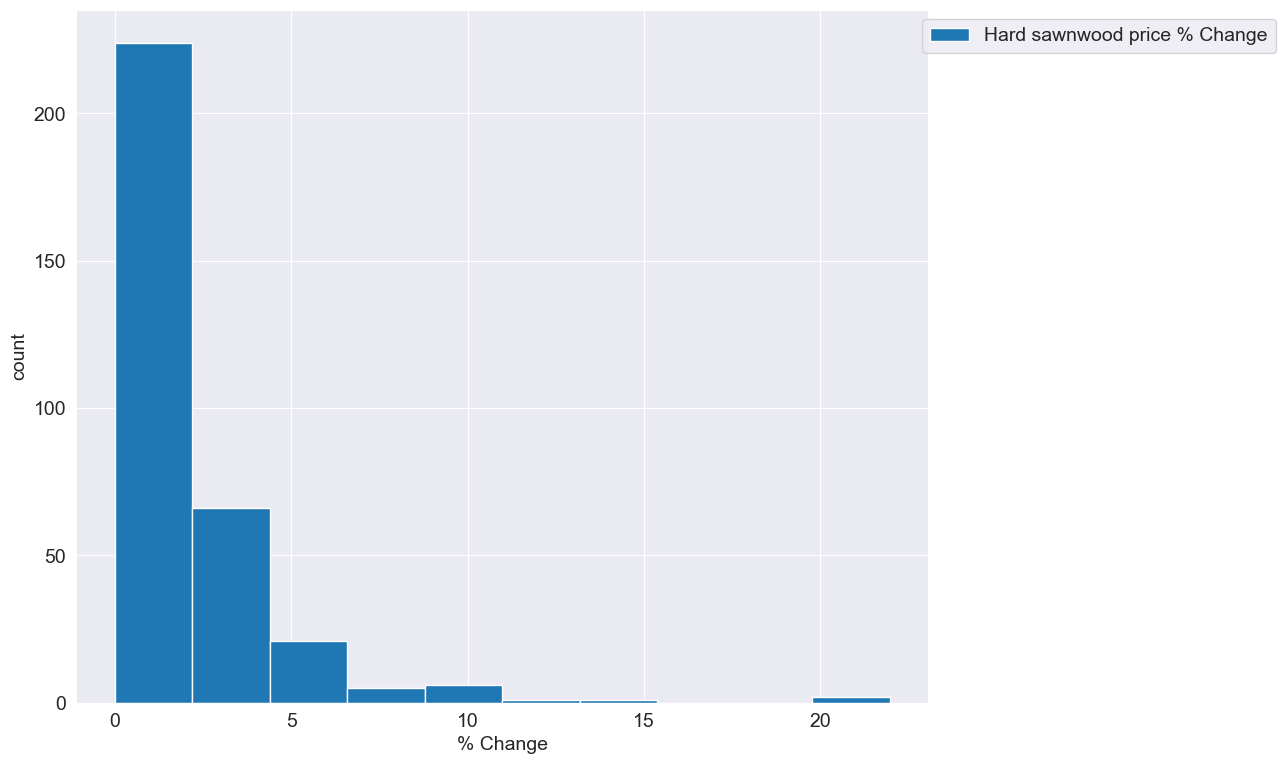

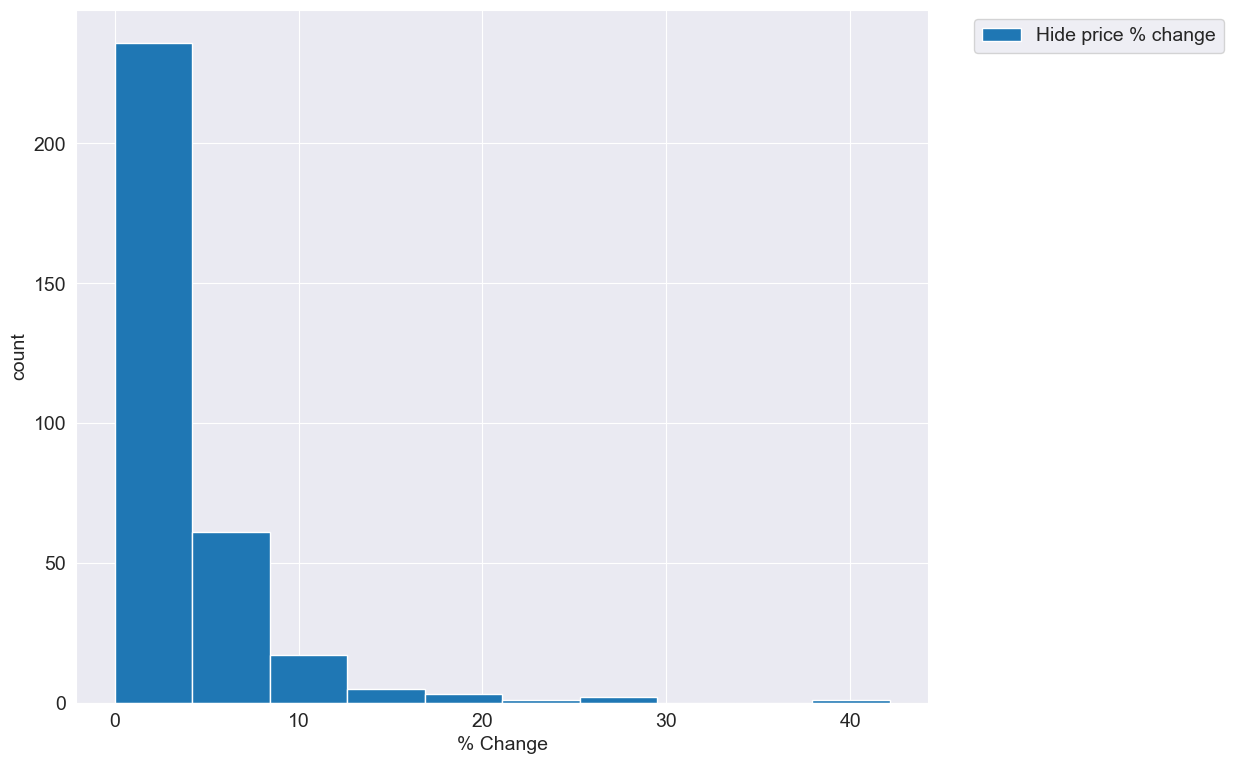

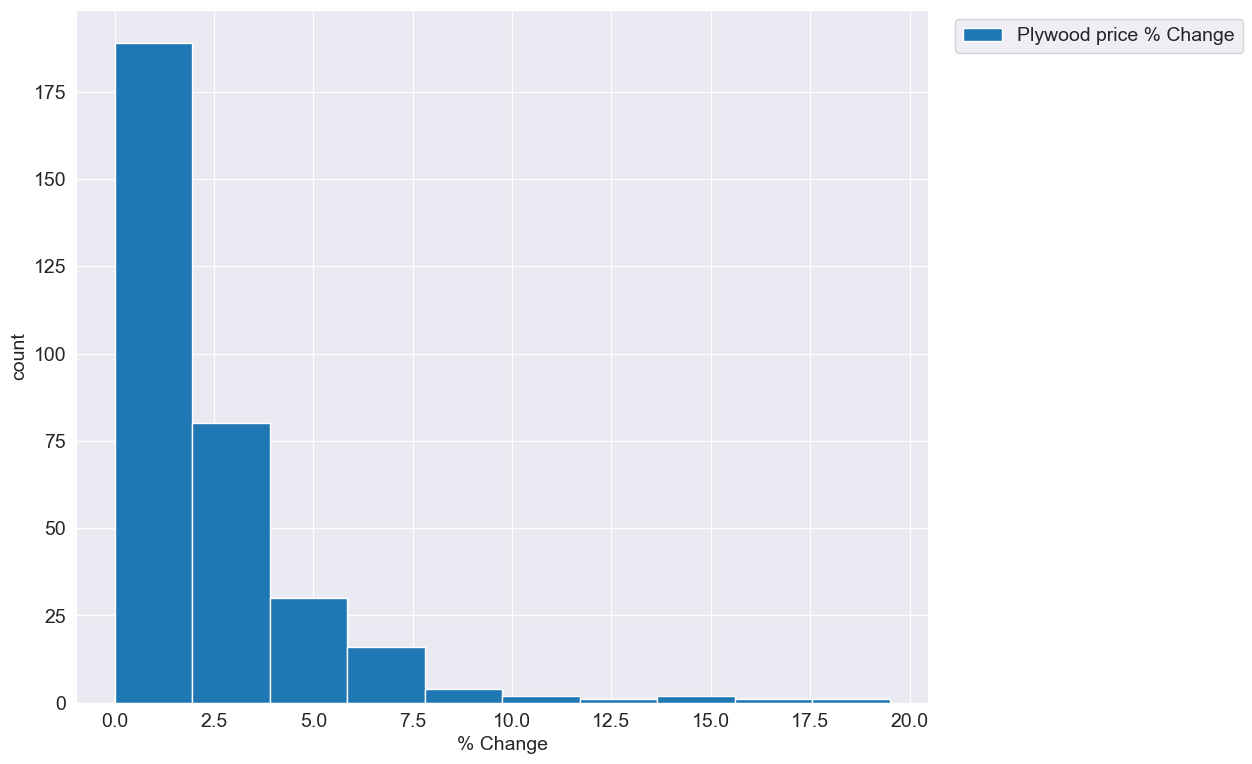

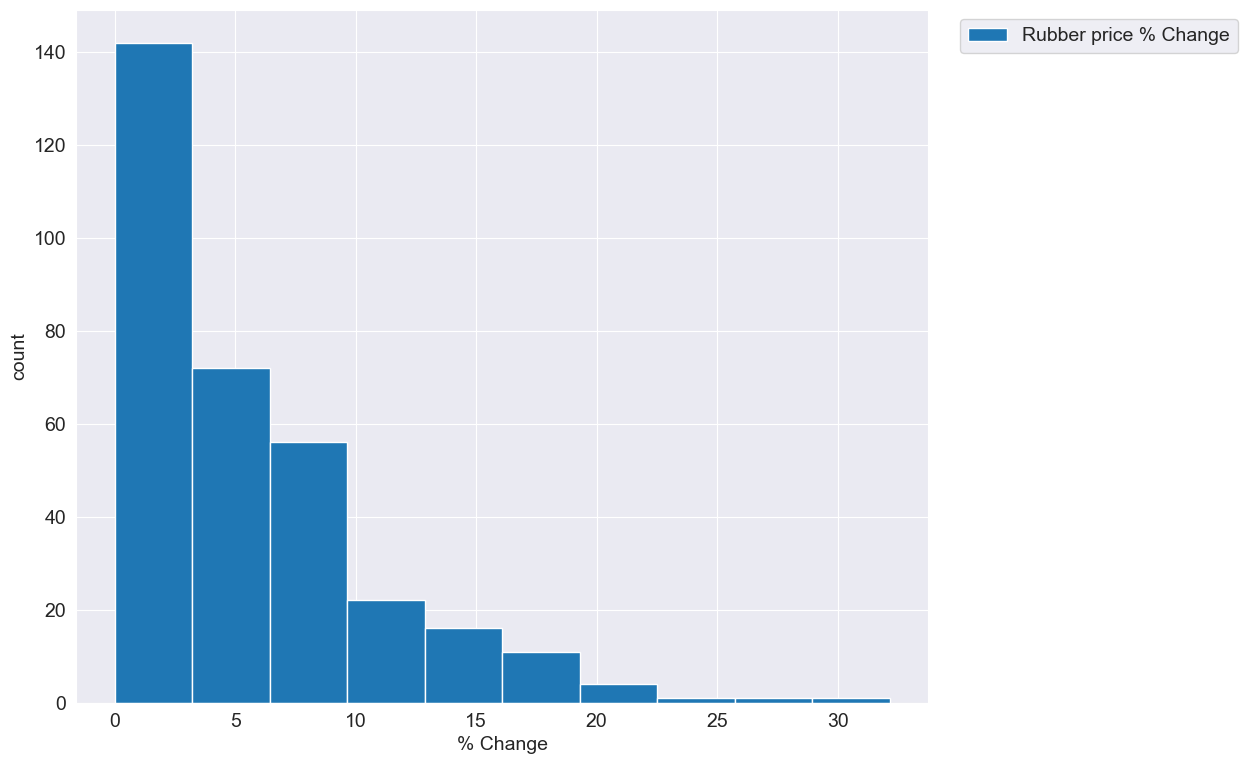

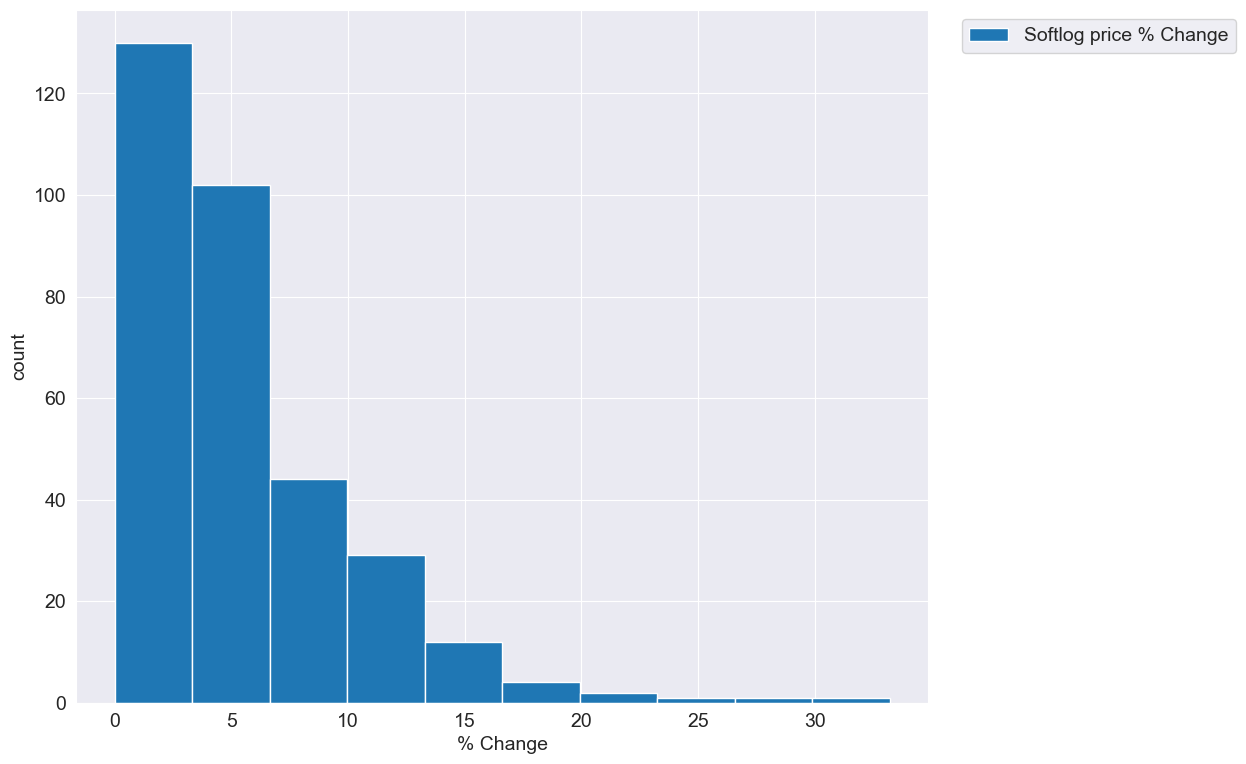

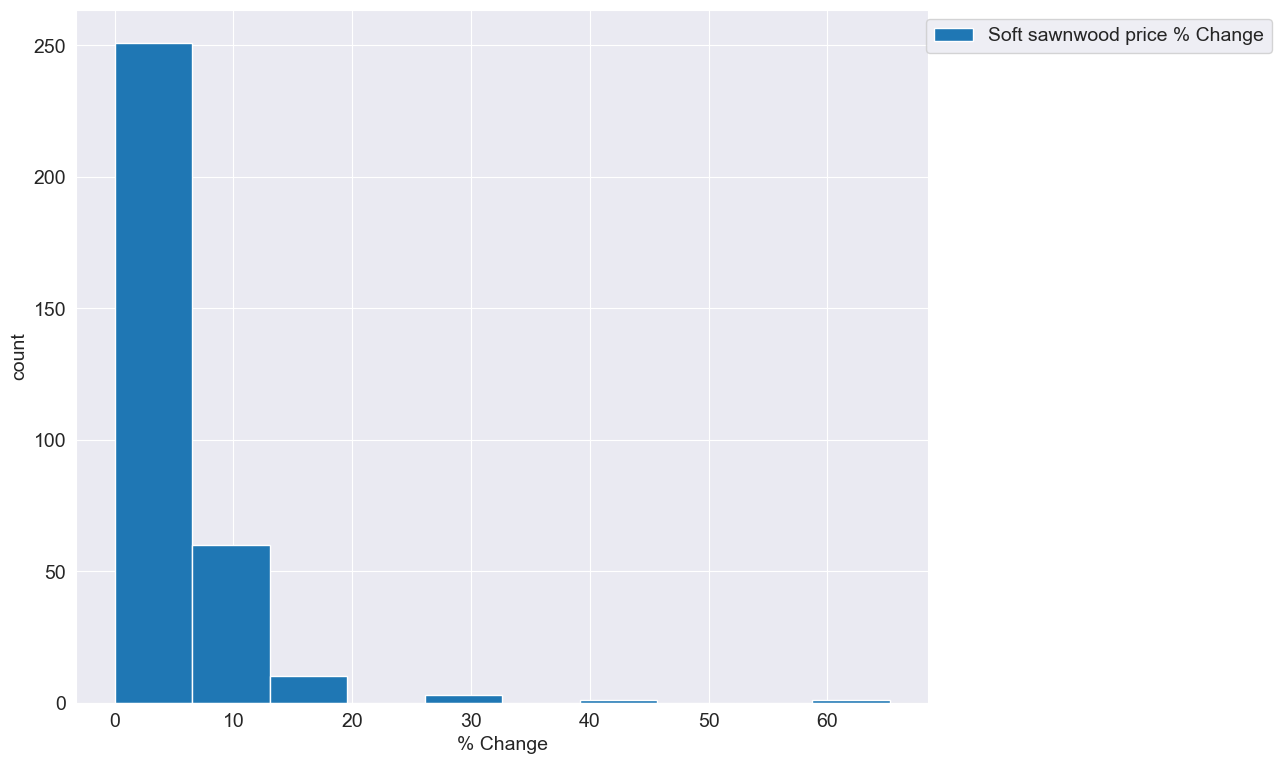

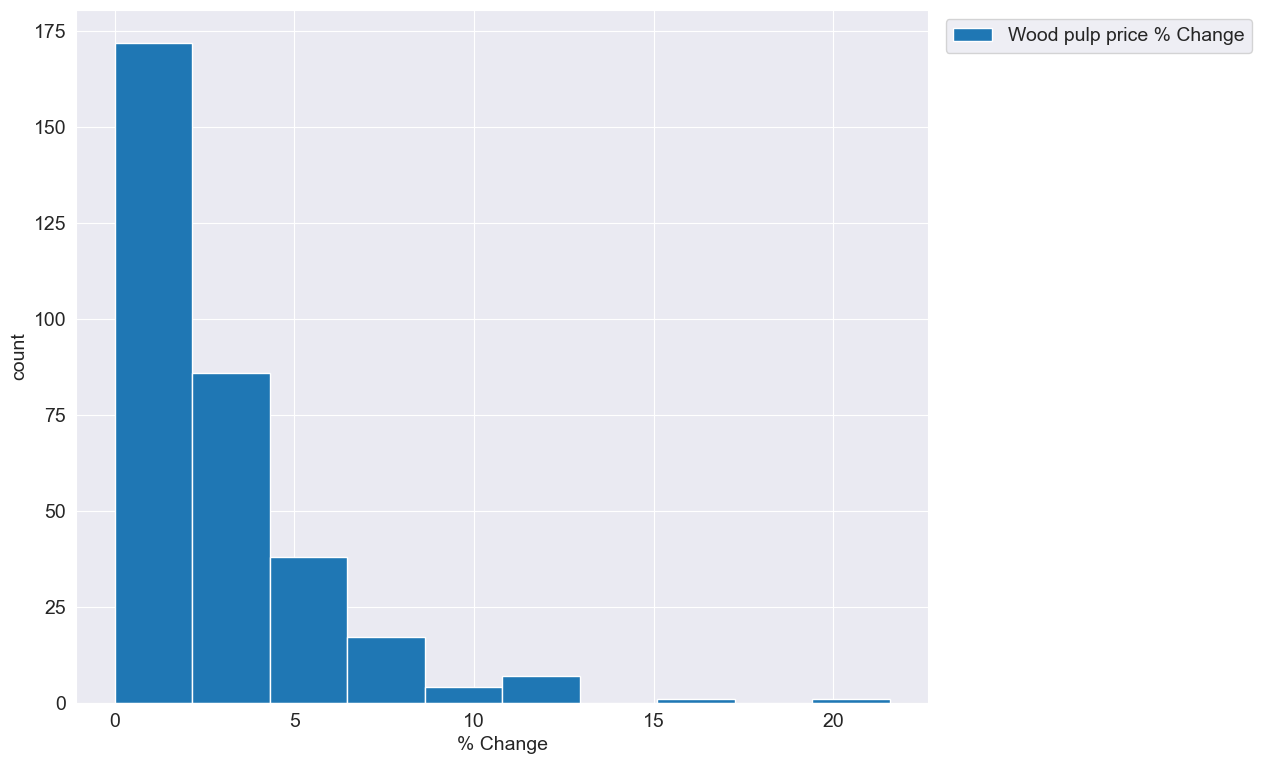

In [10]:
# df[['Wood pulp Price', 'Wood pulp price % Change']].hist(figsize=(11, 9), linewidth=1)

changelist = ['Coarse wool price % Change', 'Copra price % Change',
              'Cotton price % Change', 'Fine wool price % Change',
              'Hard log price % Change', 'Hard sawnwood price % Change',
              'Hide price % change', 'Plywood price % Change',
              'Rubber price % Change', 'Softlog price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

for i in range(len(changelist)):
  plt.figure(figsize=(12,12))
  df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
  plt.xlabel('% Change')
  plt.ylabel('count')
  plt.legend(changelist[i:], loc='upper center', bbox_to_anchor = (1.2, 1))


FINDS: The most of the feedstocks has % of price ideal frequency change less then 5%.

### Q2: Findings about the lowest feedstock price over the years

Text(0.5, 0.98, 'Raw-Materials price comparision')

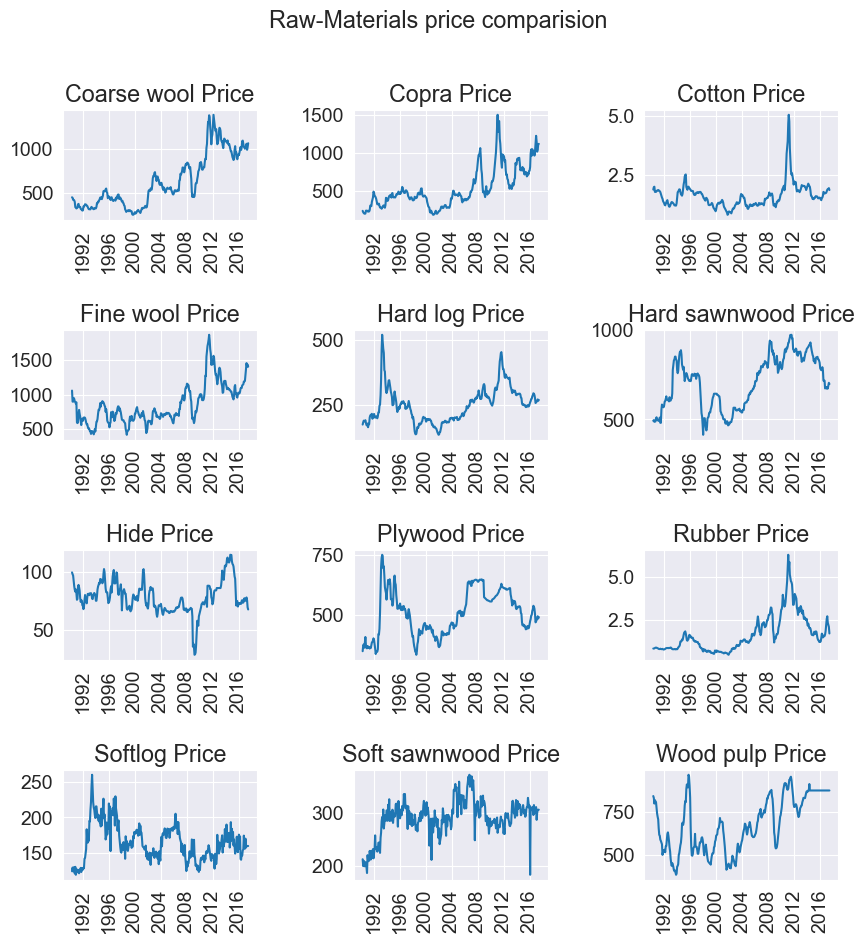

In [11]:
plt.figure(figsize=(10, 10))

materialslist = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
'Soft sawnwood Price', 'Wood pulp Price']

for i in range(len(materialslist)):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.title(materialslist[i])
  plt.plot(df[materialslist[i]])
  plt.xticks(rotation=90)

plt.suptitle("Raw-Materials price comparision")

FINDS:
*   Cotton and Ruber are the raw materials lowest prices.
*   It is important to do a drew down between both to find teh lowest price of all.

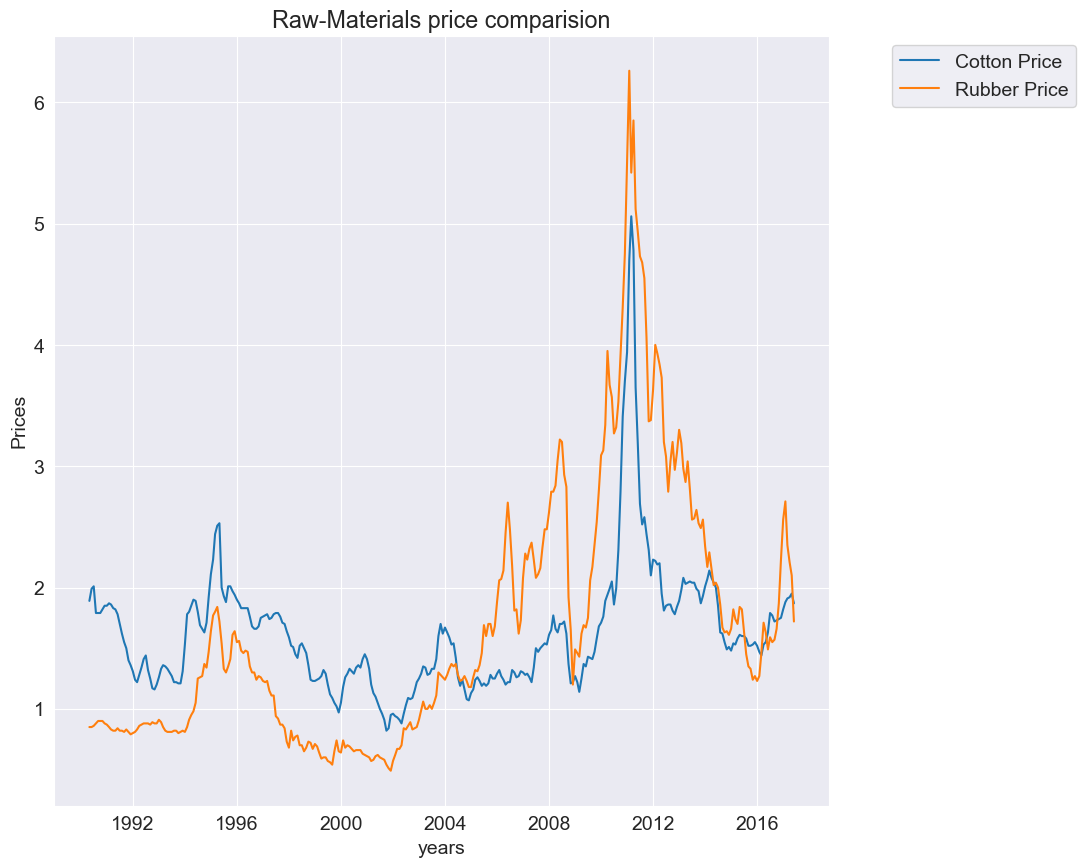

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('years')
plt.ylabel('Prices')
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2, 1))

FINDS: Cotton is the raw material with lowest price in recent years.

### Q3: Findings about the lowest and highest feedstocks price percentual variation

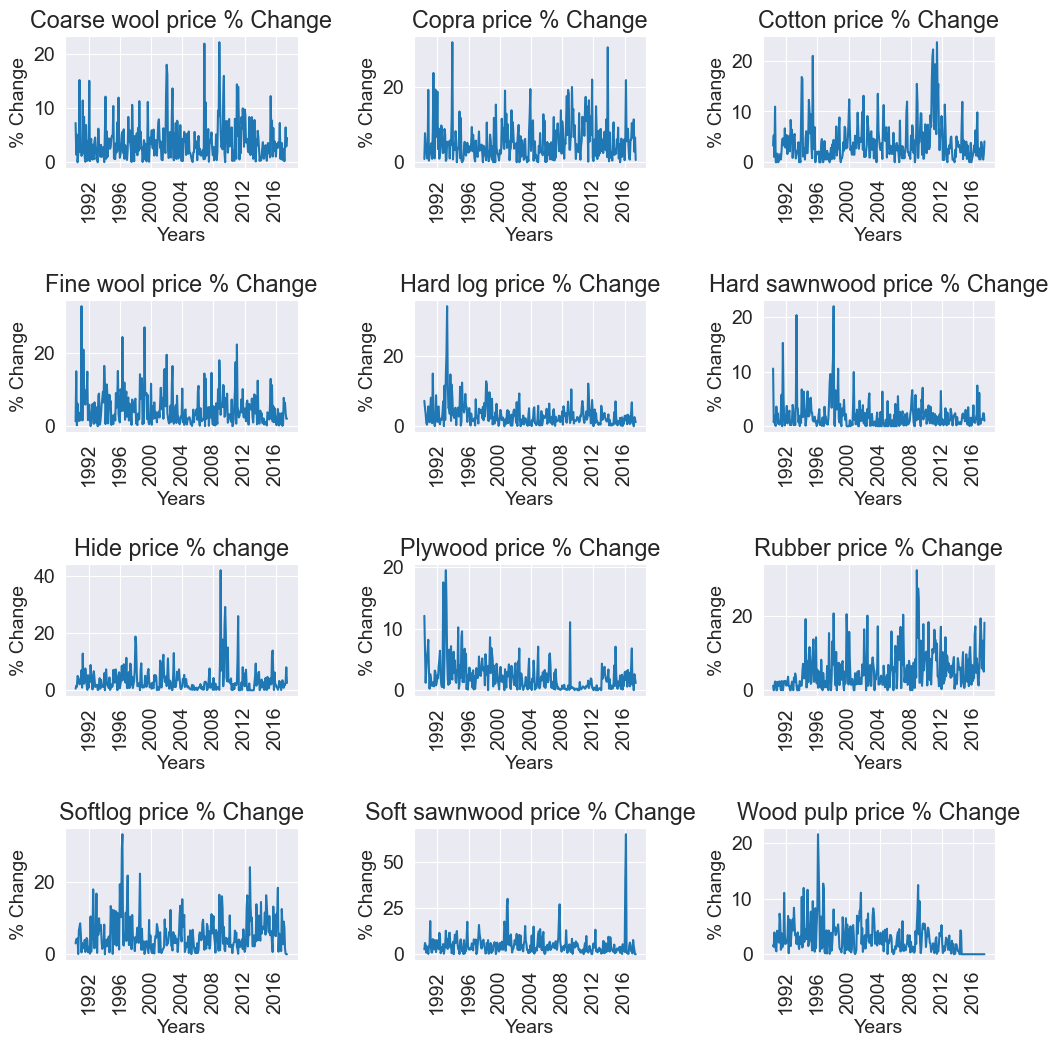

In [13]:
# lowchangelist = ['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']

plt.figure(figsize=(12, 12))

for i in range(len(changelist)):

  #r = random.random()
  #g = random.random()
  #b = random.random()

  #color = (r, g, b)

  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  #plt.plot(df[changelist[i]], c=color)
  plt.plot(df[changelist[i]])
  plt.xticks(rotation=90)
  plt.title(changelist[i])
  plt.xlabel('Years')
  plt.ylabel('% Change')

#plt.legend(changelist[i:], loc="upper_center", bbox_to_anchor=(1.2, 1))

FINDS:

*   Biggest change, in more than 60 points, observed in soft sawnwood price.
*   Smallest price change, in less than 20 percentage points, observed in plywood behavior.



### Q4: Findings referent to the feedstocks with drastic price change

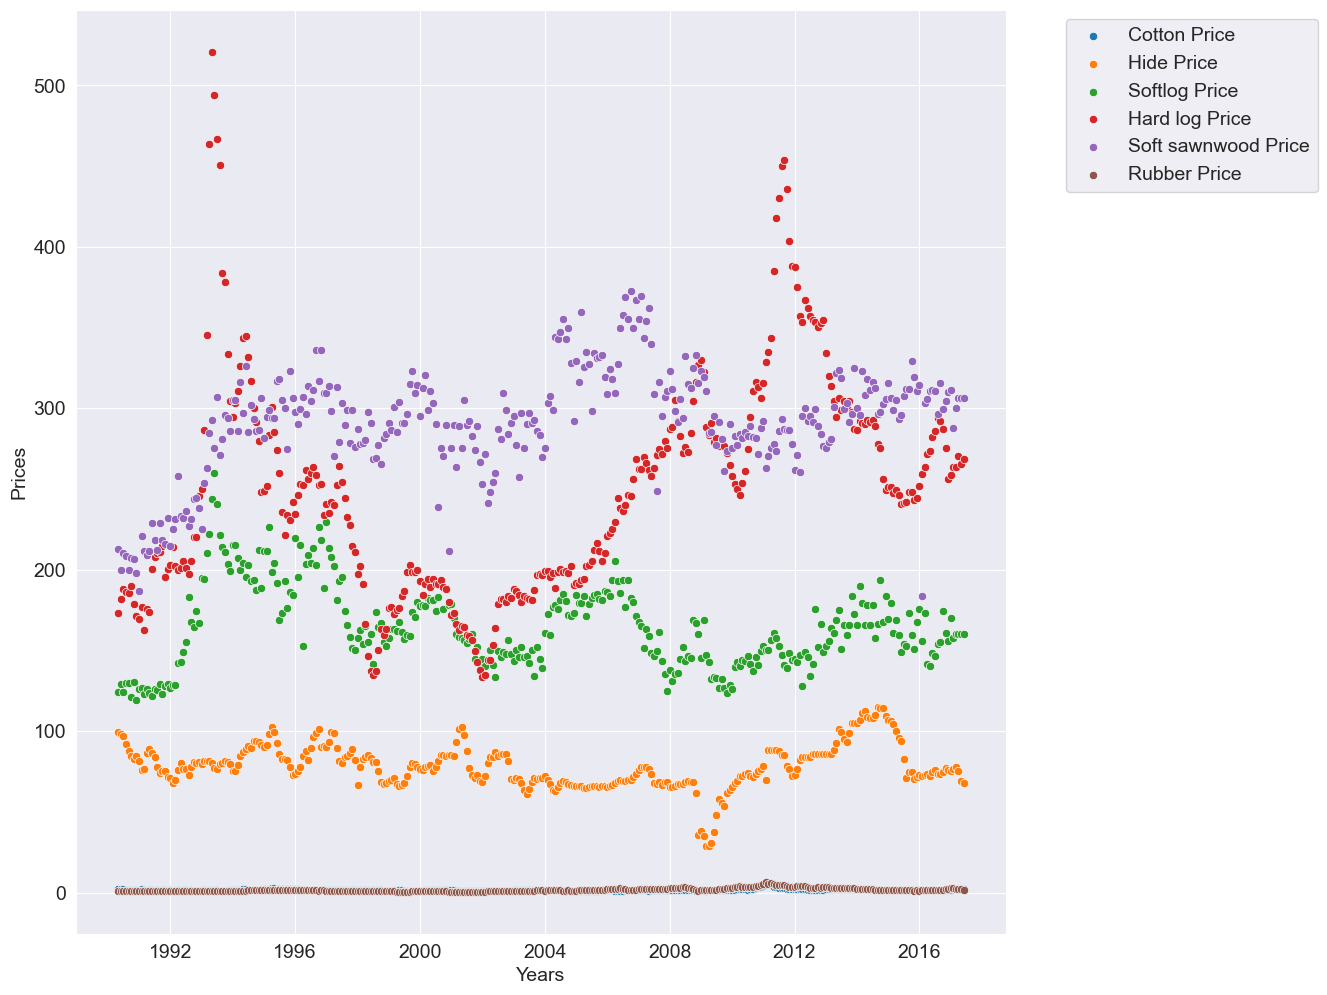

In [14]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price'])

lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')

#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

for i in range(len(lowlist)):
  sns.scatterplot(y=df[lowlist[i]],x=df.index)
  plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

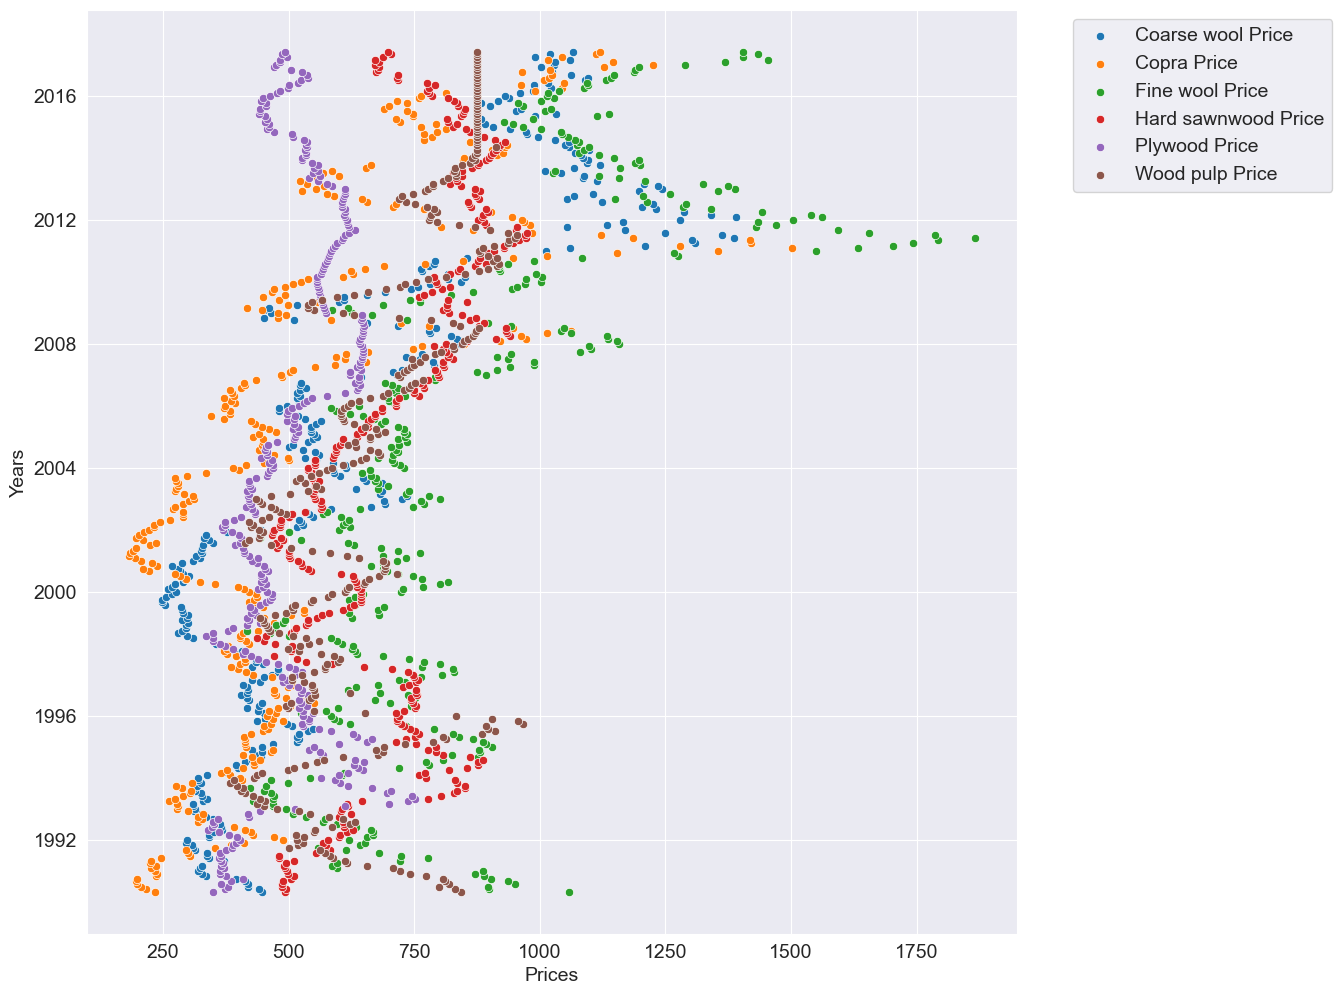

In [15]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price'])
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']

highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']

#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']\n",

plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
  sns.scatterplot(x=df[highlist[i]],y=df.index)
  plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))

FINDS:
*   Among the raw materials with the highest prices, the most drastic change regarding hard logs.
*   Among the lowest priced raw materials, there were more drastic changes in the prices of fine wool.


### Q5: Findings referent to price range of low price feedstocks

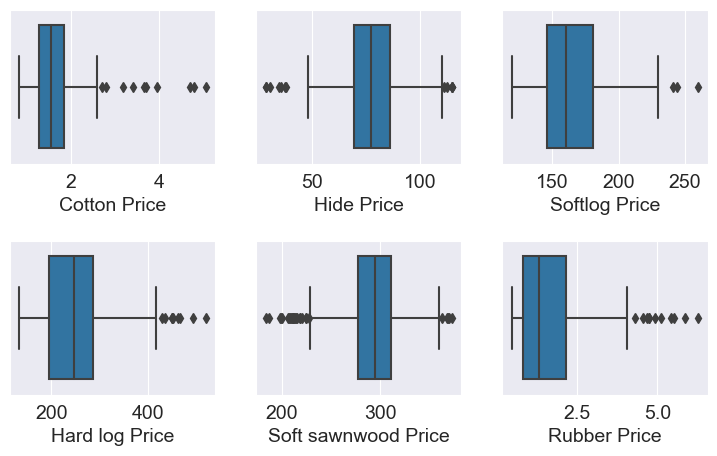

In [16]:
#plt.figure(figsize=(10, 10))\n",

lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']

for i in range(6):
  #plt.title(lowlist[i])
  plt.subplot(2, 3, i+1)
  plt.subplots_adjust( hspace=0.5 )
  sns.boxplot(x=df[lowlist[i]])

## Insights over the findings

*   Feedstoks with high and low price ranges.
*   High and low percentage variation in raw material prices.
*   Price variation over the years.
*   Correlations between prices using heat map.



## Nest Steps and more analysis
*   Furthermore, we could find out the relationship between raw materials in detail, and with the help of business knowledge, we could find out the closest raw materials.
*   We were also able to predict raw material prices by analyzing previous years.
*   By predicting the price variation and based on that, we could plan our raw material usage in advance for the next year and figure out any alternative materials.
